# Load Dependencies

In [1]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [2]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'
cleaned_ny_unemployment_rate = 'Cleaned_Data/cleaned_ny_unemployment_rate.csv'
cleaned_ohio_unemployment_rate = 'Cleaned_Data/cleaned_ohio_unemployment_rate.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)
cleaned_ny_unemployment_rate = pd.read_csv(cleaned_ny_unemployment_rate)
cleaned_ohio_unemployment_rate = pd.read_csv(cleaned_ohio_unemployment_rate)


/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# California Monthly Crime Rate Between 2014 - 2017

In [3]:
cbym_df = pd.DataFrame(crime_df, columns = ['Year', 'State Abbr.','Incident Date','Total Offender Count','Offender Race'])

#Filter the data for CA and the year between 2014 to 2017
cbym_df = cbym_df[(cbym_df.Year >= 2014) & (cbym_df['State Abbr.'] == 'CA')]

#Convert the Incident data as 'datetime' type and then separate the incident month and year from Incident date
cbym_df['Incident Date'] =  pd.to_datetime(cbym_df['Incident Date'])
cbym_df['Inc year'] = pd.to_numeric(cbym_df['Incident Date'].dt.year)
cbym_df['Inc month'] = pd.to_numeric(cbym_df['Incident Date'].dt.month)

#Crime_by_year_df.head()

#Get the total offender count using Groupby on 'Inc year' and 'Inc month'
Crime_count_mth_yr_df = cbym_df.groupby(["Inc year","Inc month"])
ccount =  Crime_count_mth_yr_df['Total Offender Count'].sum()

#Create the dataframe
ccnt_mth_yr_summary_df = pd.DataFrame({
                             'Total Offender count' : ccount,
                             })

#Convert the index as the coloumns in the dataframe
ccnt_mth_yr_summary_df = ccnt_mth_yr_summary_df.reset_index(level=["Inc year","Inc month"])

ccnt_mth_yr_summary_df.head()

,Inc year,Inc month,Total Offender count
0,2014,1,47
1,2014,2,42
2,2014,3,56
3,2014,4,69
4,2014,5,86


# Line Chart

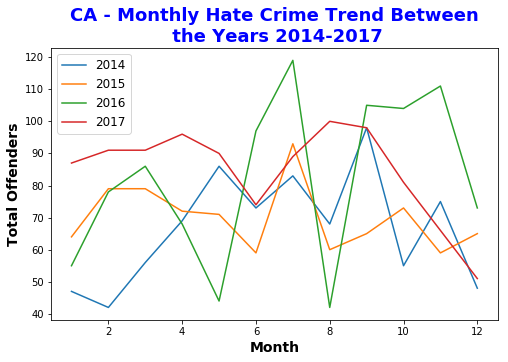

In [6]:
#Define x-axis
start_mth = ccnt_mth_yr_summary_df['Inc month'].min()
end_mth = ccnt_mth_yr_summary_df['Inc month'].max()

x_axis = np.arange(start_mth, end_mth+1, 1)

#Define plot area
plt.figure(figsize=(8,5))

#Plot the line graph for the period from 2014 to 2017

indx=0
for yr in ccnt_mth_yr_summary_df['Inc year']:

   if (indx != yr):
       indx = yr
       ccnt_data_bymth = ccnt_mth_yr_summary_df[ccnt_mth_yr_summary_df['Inc year'] == yr]
       y_axis = pd.Series(ccnt_data_bymth['Total Offender count'])
       plt.plot(x_axis, y_axis, label= yr)

plt.xlabel("Month", fontsize=14, fontweight="bold")
plt.ylabel("Total Offenders",fontsize=14, fontweight="bold")
plt.title("CA - Monthly Hate Crime Trend Between\n the Years 2014-2017",fontsize=18, fontweight='bold', color="blue")
plt.legend(loc="upper left",fontsize=12)


#save figure
plt.savefig("Images/CA_MonthlyCrimeRate_2014_2017.png")

plt.show()